In [1]:
from datetime import datetime
import pandas as pd
import math 
import matplotlib.pyplot as plt
pd.options.display.max_columns=None
country=pd.read_csv("E:\Download\Datathon\country.csv")
league=pd.read_csv("E:\Download\Datathon\league.csv")
match=pd.read_csv("E:\Download\Datathon\match.csv")
player=pd.read_csv("E:\Download\Datathon\player.csv")
player_attributes=pd.read_csv("E:\Download\Datathon\player_attributes.csv")
team=pd.read_csv(r"E:\Download\Datathon\team.csv",encoding='unicode_escape')
team_attributes=pd.read_csv(r"E:\Download\Datathon\team_attributes.csv")
new_match=pd.read_csv(r"E:\Download\Datathon\match_new1.csv")

In [2]:
player_attributes.describe()

player_id  overall_rating      potential       crossing  \
count  183978.000000   183142.000000  183142.000000  183142.000000   
mean   135900.617324       68.600015      73.460353      55.086883   
std    136927.840510        7.041139       6.592271      17.242135   
min      2625.000000       33.000000      39.000000       1.000000   
25%     34763.000000       64.000000      69.000000      45.000000   
50%     77741.000000       69.000000      74.000000      59.000000   
75%    191080.000000       73.000000      78.000000      68.000000   
max    750584.000000       94.000000      97.000000      95.000000   

           finishing  heading_accuracy  short_passing        volleys  \
count  183142.000000     183142.000000  183142.000000  181265.000000   
mean       49.921078         57.266023      62.429672      49.468436   
std        19.038705         16.488905      14.194068      18.256618   
min         1.000000          1.000000       3.000000       1.000000   
25%        34.000000         49.000000      57.000000      35.000000   
50%        53.000000         60.000000      65.000000      52.000000   
75%        65.000000         68.000000      72.000000      64.000000   
max        97.000000         98.000000      97.000000      93.000000   

           dribbling          curve  free_kick_accuracy   long_passing  \
count  183142.000000  181265.000000       183142.000000  183142.000000   
mean       59.175154      52.965675           49.380950      57.069880   
std        17.744688      18.255788           17.831746      14.394464   
min         1.000000       2.000000            1.000000       3.000000   
25%        52.000000      41.000000           36.000000      49.000000   
50%        64.000000      56.000000           50.000000      59.000000   
75%        72.000000      67.000000           63.000000      67.000000   
max        97.000000      94.000000           97.000000      97.000000   

        ball_control   acceleration   sprint_speed        agility  \
count  183142.000000  183142.000000  183142.000000  181265.000000   
mean       63.388879      67.659357      68.051244      65.970910   
std        15.196671      12.983326      12.569721      12.954585   
min         5.000000      10.000000      12.000000      11.000000   
25%        58.000000      61.000000      62.000000      58.000000   
50%        67.000000      69.000000      69.000000      68.000000   
75%        73.000000      77.000000      77.000000      75.000000   
max        97.000000      97.000000      97.000000      96.000000   

           reactions        balance     shot_power        jumping  \
count  183142.000000  181265.000000  183142.000000  181265.000000   
mean       66.103706      65.189496      61.808427      66.969045   
std         9.155408      13.063188      16.135143      11.006734   
min        17.000000      12.000000       2.000000      14.000000   
25%        61.000000      58.000000      54.000000      60.000000   
50%        67.000000      67.000000      65.000000      68.000000   
75%        72.000000      74.000000      73.000000      74.000000   
max        96.000000      96.000000      97.000000      96.000000   

             stamina       strength     long_shots     aggression  \
count  183142.000000  183142.000000  183142.000000  183142.000000   
mean       67.038544      67.424529      53.339431      60.948046   
std        13.165262      12.072280      18.367025      16.089521   
min        10.000000      10.000000       1.000000       6.000000   
25%        61.000000      60.000000      41.000000      51.000000   
50%        69.000000      69.000000      58.000000      64.000000   
75%        76.000000      76.000000      67.000000      73.000000   
max        96.000000      96.000000      96.000000      97.000000   

       interceptions    positioning         vision      penalties  \
count  183142.000000  183142.000000  181265.000000  183142.000000   
mean       52.009271      55.786504      57.873550      55.0

array([[<AxesSubplot:title={'center':'player_id'}>,
        <AxesSubplot:title={'center':'overall_rating'}>,
        <AxesSubplot:title={'center':'potential'}>,
        <AxesSubplot:title={'center':'crossing'}>,
        <AxesSubplot:title={'center':'finishing'}>,
        <AxesSubplot:title={'center':'heading_accuracy'}>],
       [<AxesSubplot:title={'center':'short_passing'}>,
        <AxesSubplot:title={'center':'volleys'}>,
        <AxesSubplot:title={'center':'dribbling'}>,
        <AxesSubplot:title={'center':'curve'}>,
        <AxesSubplot:title={'center':'free_kick_accuracy'}>,
        <AxesSubplot:title={'center':'long_passing'}>],
       [<AxesSubplot:title={'center':'ball_control'}>,
        <AxesSubplot:title={'center':'acceleration'}>,
        <AxesSubplot:title={'center':'sprint_speed'}>,
        <AxesSubplot:title={'center':'agility'}>,
        <AxesSubplot:title={'center':'reactions'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center

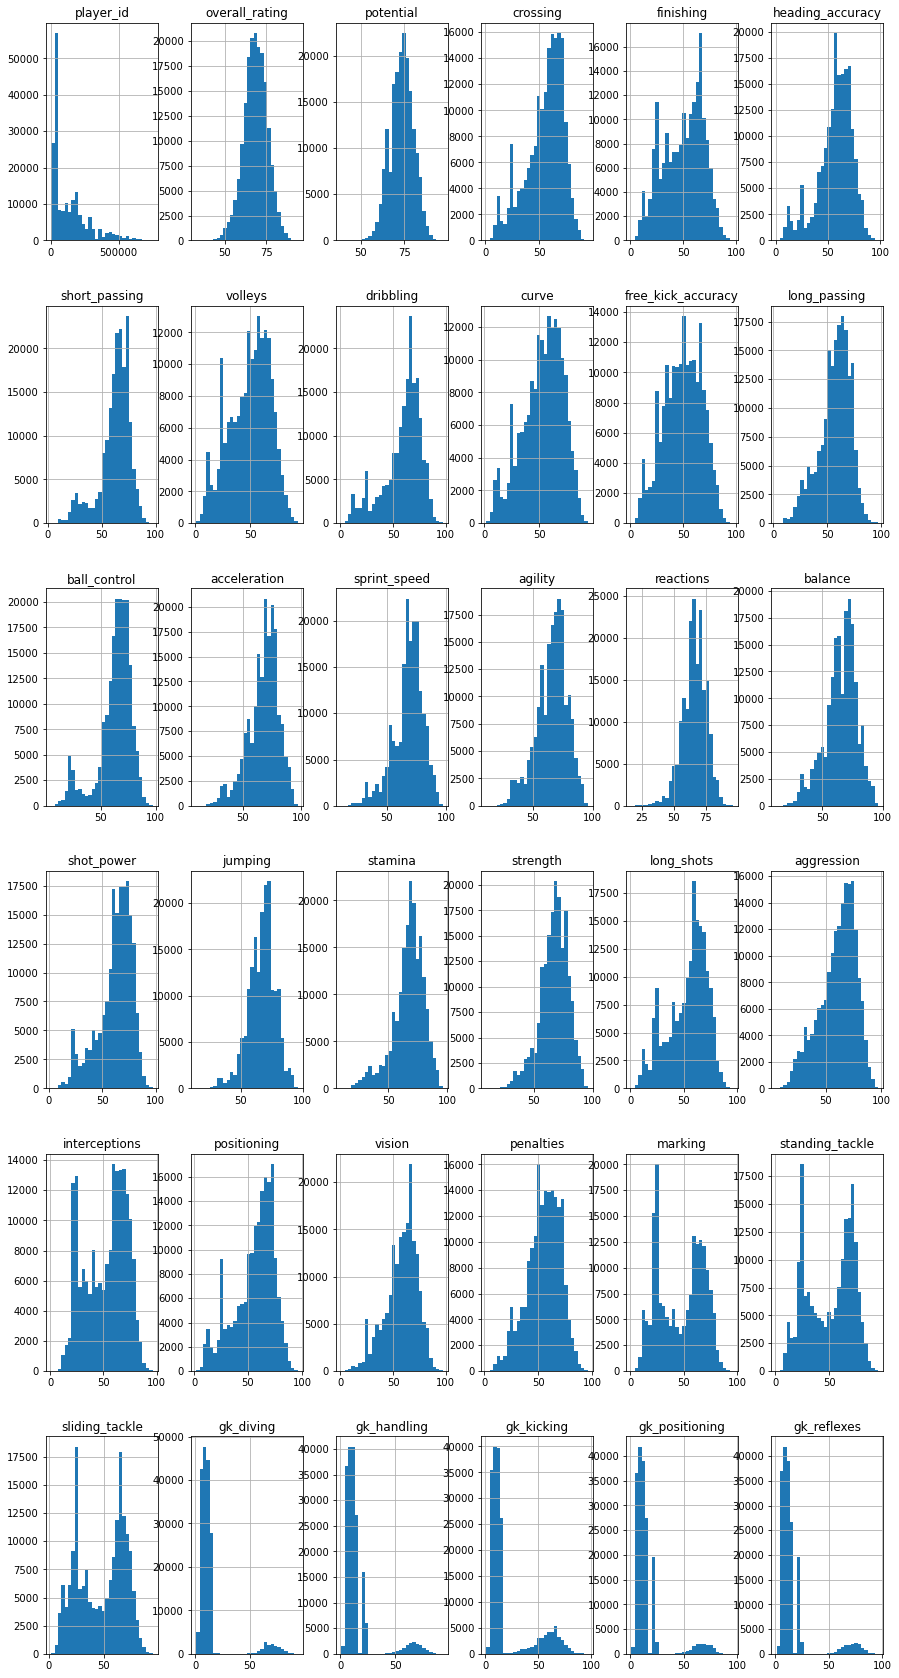

In [3]:
player_attributes.hist(bins=30, figsize=(15, 30))

In [4]:
new_match.shape

(25979, 943)

In [5]:
new_match.drop(list(new_match.columns[new_match.columns.get_loc("B365H"):new_match.columns.get_loc("BSA")+1]),axis=1,inplace=True)



In [6]:
for name in new_match.columns:
    if "_player_id" in name:
        new_match.drop(name,axis=1,inplace=True)
    if "_player_" in name and "_date" in name:
        new_match.drop(name,axis=1,inplace=True)
    

In [7]:
new_match.shape

(25979, 869)

In [8]:
new_match1=new_match
new_match1

Unnamed: 0  country_id  league_id     season  stage          date  \
0               0           1          1  2008/2009      1  8/17/08 0:00   
1               1           1          1  2008/2009      1  8/16/08 0:00   
2               2           1          1  2008/2009      1  8/16/08 0:00   
3               3           1          1  2008/2009      1  8/17/08 0:00   
4               4           1          1  2008/2009      1  8/16/08 0:00   
...           ...         ...        ...        ...    ...           ...   
25974       25974       24558      24558  2015/2016      9  9/22/15 0:00   
25975       25975       24558      24558  2015/2016      9  9/23/15 0:00   
25976       25976       24558      24558  2015/2016      9  9/23/15 0:00   
25977       25977       24558      24558  2015/2016      9  9/22/15 0:00   
25978       25978       24558      24558  2015/2016      9  9/23/15 0:00   

       match_id  home_team_id  away_team_id  home_team_goal  away_team_goal  \
0        492473          9987          9993               1               1   
1        492474         10000          9994               0               0   
2        492475          9984          8635               0               3   
3        492476          9991          9998               5               0   
4        492477          7947          9985               1               3   
...         ...           ...           ...             ...             ...   
25974   1992091         10190         10191               1               0   
25975   1992092          9824         10199               1               2   
25976   1992093          9956         10179               2               0   
25977   1992094          7896         10243               0               0   
25978   1992095         10192          9931               4               3   

       home_player_1  home_player_2  home_player_3  home_player_4  \
0                NaN            NaN            NaN            NaN   
1                NaN            NaN            NaN            NaN   
2                NaN            NaN            NaN            NaN   
3                NaN            NaN            NaN            NaN   
4                NaN            NaN            NaN            NaN   
...              ...            ...            ...            ...   
25974        42231.0       678384.0        95220.0       638592.0   
25975        33272.0        41621.0        25813.0       257845.0   
25976       157856.0       274779.0       177689.0       294256.0   
25977            NaN         8881.0       173534.0        39646.0   
25978       274787.0       492132.0       108451.0        25815.0   

       home_player_5  home_player_6  home_player_7  home_player_8  \
0                NaN            NaN            NaN            NaN   
1                NaN            NaN            NaN            NaN   
2                NaN            NaN            NaN            NaN   
3                NaN            NaN            NaN            NaN   
4                NaN            NaN            NaN            NaN   
...              ...            ...            ...            ...   
25974       413155.0        45780.0       171229.0        67333.0   
25975       114735.0        42237.0       113227.0       358156.0   
25976        42258.0        39979.0       173936.0       147959.0   
25977       282287.0       340790.0       393337.0         8893.0   
25978        94553.0       384376.0       598355.0        36785.0   

       home_player_9  home_player_10  home_player_11  away_player_1  \
0                NaN             NaN             NaN            NaN   
1                NaN             NaN             NaN            NaN   
2                NaN             NaN             NaN            NaN   
3                NaN             NaN             NaN            NaN   
4                NaN             NaN             NaN            NaN   
...              ...             ...             ...         

In [10]:
from collections import Counter
  
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]

total_att=int(len(new_match1.columns[new_match1.columns.get_loc("home_player_1_overall_rating"):new_match1.columns.get_loc("home_player_11_gk_reflexes")+1]))
for index in new_match1.index:
    print(index)
    for field in range(int(total_att/11)):
        start=new_match1.columns.get_loc("home_player_1_overall_rating")+field
        end=new_match1.columns.get_loc("home_player_1_overall_rating")+total_att+1-total_att/11+field
        pre=list(new_match1.columns[range(start,int(end),int(total_att/11))])
        
        if field==2:
            new_match1.loc[index,"home_"+str(new_match1.columns[start])[14:]]=list(new_match1.loc[index,pre]).count("left")
        elif field==3:
            new_match1.loc[index,"home_"+str(new_match1.columns[start])[14:]]=most_frequent(list(new_match1.loc[index,pre]))
        elif field==4:
            new_match1.loc[index,"home_"+str(new_match1.columns[start])[14:]]=most_frequent(list(new_match1.loc[index,pre]))
        elif field in list(range(33,38)):
            new_match1.loc[index,"home_"+str(new_match1.columns[start])[14:]]=max(list(new_match1.loc[index,pre]))
        else:
            new_match1["home_"+str(new_match1.columns[start])[14:]]=new_match1[pre].mean(axis=1)
            
    for field in range(int(total_att/11)):
        start=new_match1.columns.get_loc("away_player_1_overall_rating")+field
        end=new_match1.columns.get_loc("away_player_1_overall_rating")+total_att+1-total_att/11+field
        pre=list(new_match1.columns[range(start,int(end),int(total_att/11))])
        
        if field==2:
            new_match1.loc[index,"away_"+str(new_match1.columns[start])[14:]]=list(new_match1.loc[index,pre]).count("left")
        elif field==3:
            new_match1.loc[index,"away_"+str(new_match1.columns[start])[14:]]=most_frequent(list(new_match1.loc[index,pre]))
        elif field==4:
            new_match1.loc[index,"away_"+str(new_match1.columns[start])[14:]]=most_frequent(list(new_match1.loc[index,pre]))
        elif field in list(range(33,38)):
            new_match1.loc[index,"away_"+str(new_match1.columns[start])[14:]]=max(list(new_match1.loc[index,pre]))
        else:
            new_match1["away_"+str(new_match1.columns[start])[14:]]=new_match1[pre].mean(axis=1)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [ ]:
new_match1

In [ ]:
new_match=new_match1.drop(new_match1.columns[new_match1.columns.get_loc("home_player_1_overall_rating"):new_match1.columns.get_loc("away_player_11_gk_reflexes")+1],axis=1)

In [ ]:
new_match.to_csv(r'E:\Download\Datathon\match_new2.csv')